# Polynomials over GF($2^m$) - Add Constant

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GF2PolyAddK`
In place addition of a constant polynomial defined over GF($2^m$).

The bloq implements in place addition of a classical constant polynomial $g(x)$ and
a quantum register $|f(x)\rangle$ storing coefficients of a degree-n polynomial defined
over GF($2^m$). Addition in GF($2^m$) simply reduces to a component wise XOR, which can
be implemented via X gates.

$$
    |f(x)\rangle  \rightarrow |f(x) + g(x)\rangle
$$

#### Parameters
 - `qgf_poly`: An instance of `QGFPoly` type that defines the data type for quantum register $|f(x)\rangle$ storing coefficients of a degree-n polynomial defined over GF($2^m$).
 - `g_x`: An instance of `galois.Poly` that specifies that constant polynomial g(x) defined over GF($2^m$) that should be added to the input register f(x). 

#### Registers
 - `f_x`: Input THRU register that stores coefficients of polynomial defined over $GF(2^m)$.


In [2]:
from qualtran.bloqs.gf_poly_arithmetic import GF2PolyAddK

### Example Instances

In [3]:
from galois import Poly

from qualtran import QGF, QGFPoly

qgf_poly = QGFPoly(4, QGF(2, 3))
g_x = Poly(qgf_poly.qgf.gf_type([1, 2, 3, 4, 5]))
gf2_poly_4_8_add_k = GF2PolyAddK(qgf_poly, g_x)

In [4]:
import sympy
from galois import Poly

from qualtran import QGF, QGFPoly

n, m = sympy.symbols('n, m', positive=True, integers=True)
qgf_poly = QGFPoly(n, QGF(2, m))
gf2_poly_add_k_symbolic = GF2PolyAddK(qgf_poly, Poly([0, 0, 0, 0]))

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([gf2_poly_4_8_add_k, gf2_poly_add_k_symbolic],
           ['`gf2_poly_4_8_add_k`', '`gf2_poly_add_k_symbolic`'])

### Call Graph

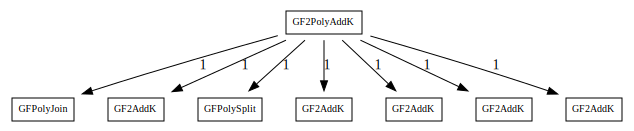

#### Counts totals:
 - `GF2AddK`: 1
 - `GF2AddK`: 1
 - `GF2AddK`: 1
 - `GF2AddK`: 1
 - `GF2AddK`: 1
 - `GFPolyJoin`: 1
 - `GFPolySplit`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
gf2_poly_4_8_add_k_g, gf2_poly_4_8_add_k_sigma = gf2_poly_4_8_add_k.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gf2_poly_4_8_add_k_g)
show_counts_sigma(gf2_poly_4_8_add_k_sigma)